# 1 Image feature extraction
Outline:
- 1.1 Function definitions - note: run all the cells before trying to run new experiments
- 1.2 Experiments
    - experiments 01 - xx: each image is represented as an individual data set, with data points being small overlapping pixel patches of the image.
    - experiments 02 - xx: a data set is a collection of images, where each image represents a single data point.
- 1.3 Datasets - link to resources for image libraries and description of datasets. The raw data can be found in the separate folder img_data


## 1.1 Function definitions
Loading the necessary libaries

In [1]:
import numpy as np
from sklearn.feature_extraction import image
from sklearn.decomposition import PCA
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import minmax_scale
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import math
import joblib

Image loading and spliting each image into patches. The idea here is to treat each image as a seperate data set with:
- Number of datapoints = numeber of patches
- Number of features = dimension of a single patch

In [2]:
def split_patches(path_list, max_img_resolution, patch_size):
    patches_list = []
    for path in path_list:
        img = imread(path, as_gray=True)
        original_height, original_width = img.shape
        max_size = max_img_resolution
        scaling_factor = max(max_size / original_height, max_size / original_width)
        new_height = int(original_height * scaling_factor)
        new_width = int(original_width * scaling_factor)
        # Resize the image
        img = resize(img, (new_height, new_width), anti_aliasing=True)
        #print(img.shape)
        patches = image.extract_patches_2d(img,(patch_size,patch_size))
        #print(patches.shape)
        num_patches = patches.shape[0]
        flat_patches = patches.reshape(num_patches,-1)
        patches_list.append(flat_patches)
    return patches_list


Feature reduction with PCA

In [3]:
def pca_reduction(patches_list, n_features):
    pca = PCA(n_components=n_features)
    reduced_patches_list = []
    for p in patches_list:
        reduced_p = pca.fit_transform(p)
        reduced_patches_list.append(reduced_p)
    return reduced_patches_list

Visualizing a list of datasets with 2d scatterplots

In [4]:
def plot_vis(plot_list): #takes a list of data sets to visualize in a scatter plot. Each entry should have format of list of arrays with each array n*2
    num_plot = len(plot_list)
    cols = 3
    rows = math.ceil(num_plot / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

    for i, plot in enumerate(plot_list):
        x = plot[:, 0]
        y = plot[:, 1]
        ax = axes[i]
        ax.scatter(x, y, s=60, alpha=1.0)  # Use scatter plot for large datasets
        ax.set_title("img_new_data" + str(i+1))
        ax.grid(True)
         
    plt.tight_layout()
    plt.show()

## 1.2 Experiments

In [5]:
path_list = [] 
for i in range(17): #generate image list to load for the experiments
    path = "img_data/img" + str(i+1) + ".jpg"
    path_list.append(path)
print(path_list)

['img_data/img1.jpg', 'img_data/img2.jpg', 'img_data/img3.jpg', 'img_data/img4.jpg', 'img_data/img5.jpg', 'img_data/img6.jpg', 'img_data/img7.jpg', 'img_data/img8.jpg', 'img_data/img9.jpg', 'img_data/img10.jpg', 'img_data/img11.jpg', 'img_data/img12.jpg', 'img_data/img13.jpg', 'img_data/img14.jpg', 'img_data/img15.jpg', 'img_data/img16.jpg', 'img_data/img17.jpg']


### Experiment 01
Visualize each image in a scatterplot. Here the idea is that each image represents an individual data set where the features have been reduced through PCA

['img_data/img1.jpg', 'img_data/img2.jpg', 'img_data/img3.jpg', 'img_data/img4.jpg', 'img_data/img5.jpg', 'img_data/img6.jpg', 'img_data/img7.jpg', 'img_data/img8.jpg', 'img_data/img9.jpg', 'img_data/img10.jpg', 'img_data/img11.jpg', 'img_data/img12.jpg', 'img_data/img13.jpg', 'img_data/img14.jpg', 'img_data/img15.jpg', 'img_data/img16.jpg', 'img_data/img17.jpg']
image preprocessing done
feature reduction done


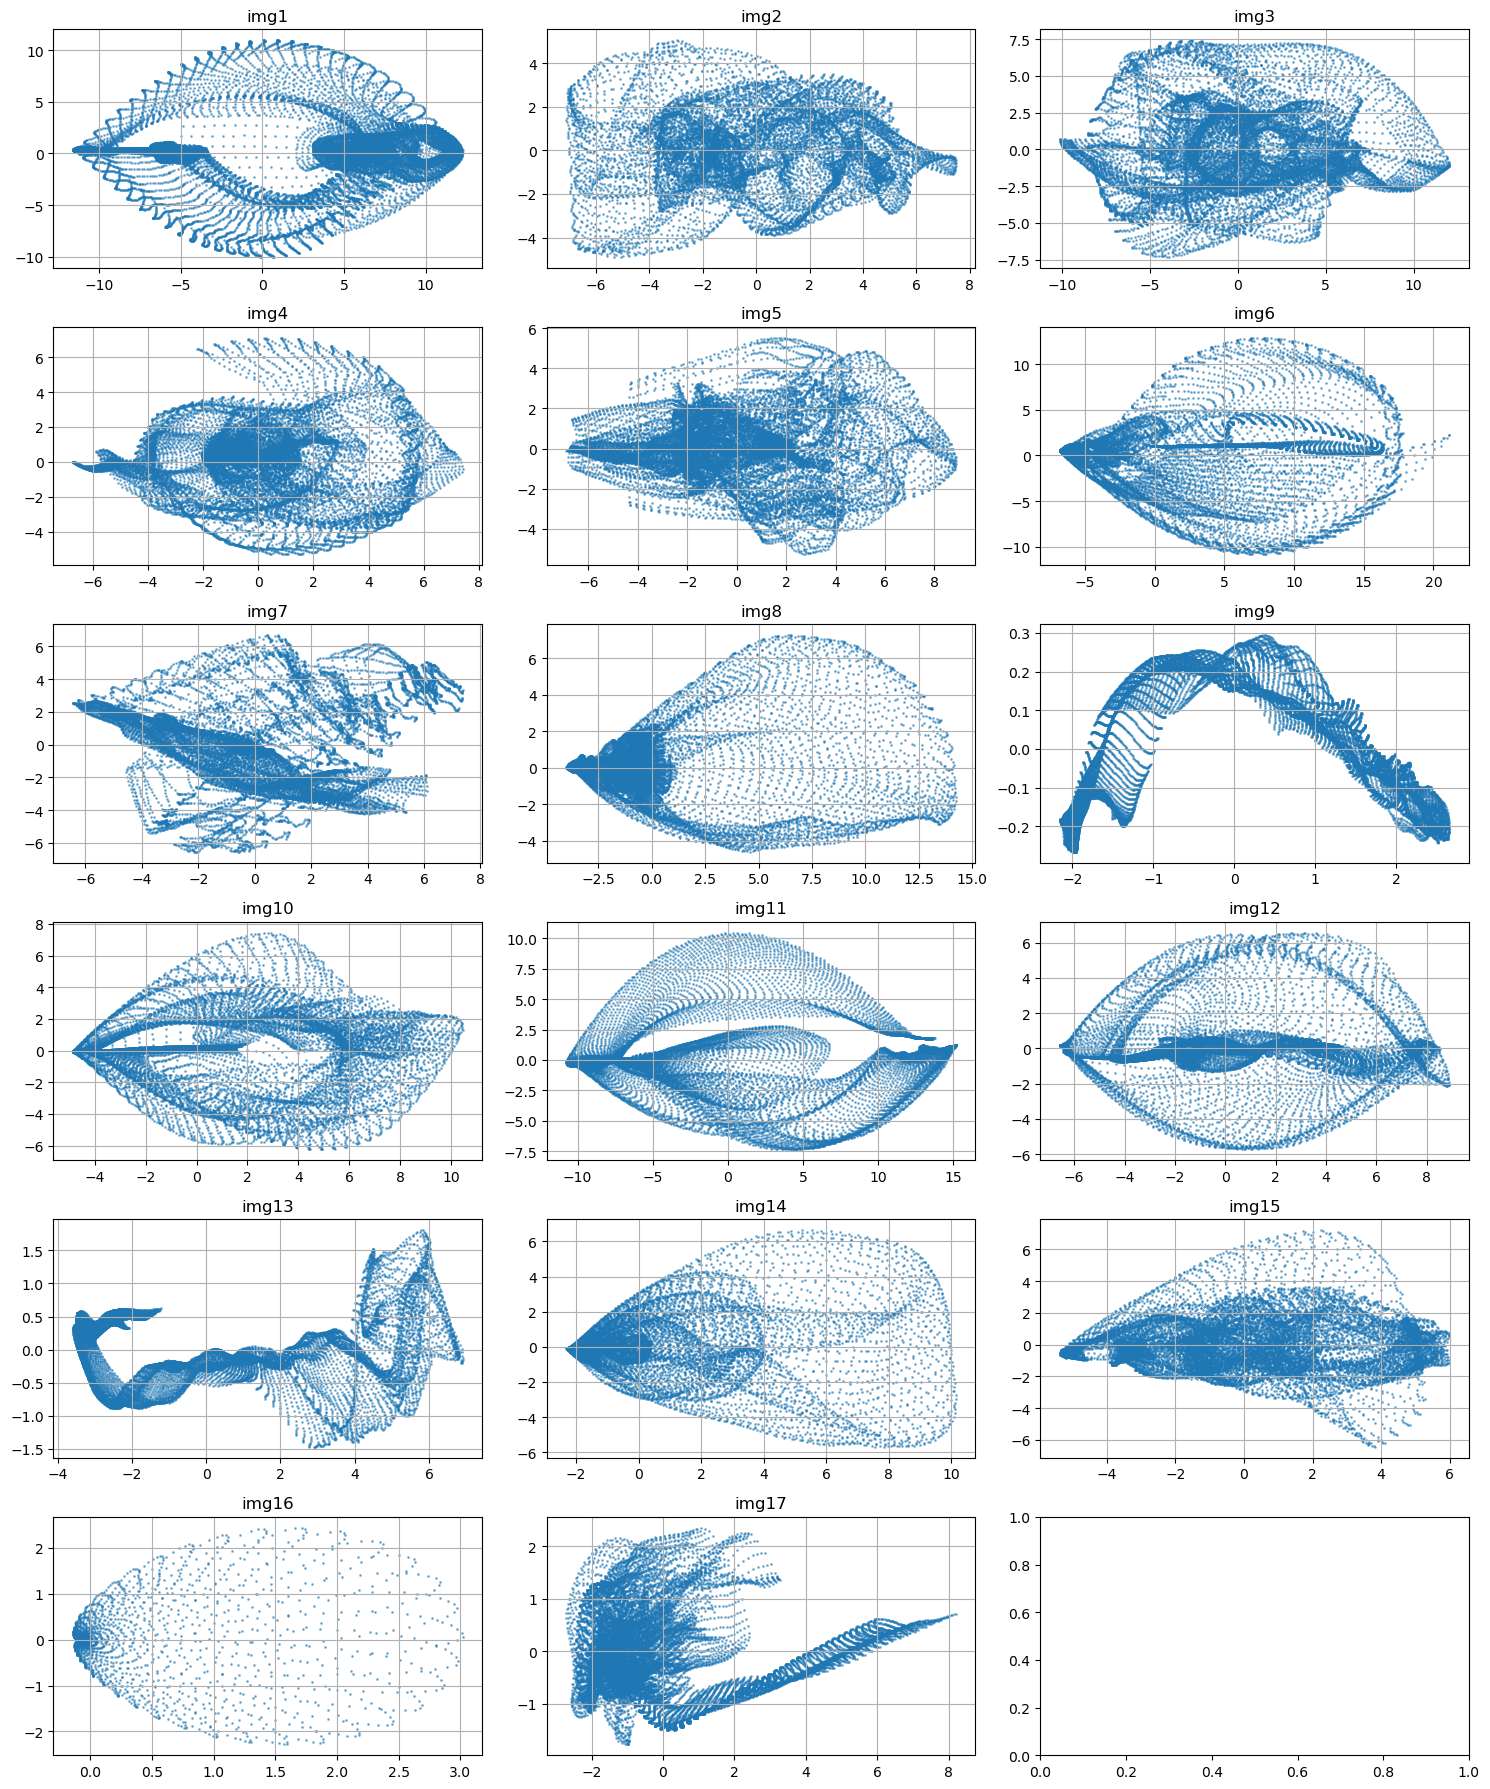

In [7]:
patches = split_patches(path_list,200,30) # arguments: path list for images, max image resolution, patch size
print("image preprocessing done")
reduced_patches = pca_reduction(patches,2) # arguments: list of image patches, number of features to reduce to
print("feature reduction done")
plot_vis(reduced_patches)

### Experiment 02
Use unsupervised neural network models Restricted Boltzmann machine to extract a small number of features (10) from a single image. Here the network gets trained on the data set consisting of 17 images. In addition the data set was artificially enlarged by moving a around a rectangular frame to cut out. The larger data set constist of around 2000 cuts from the original 17 images.

In [7]:
patches = split_patches(path_list,67,64) # arguments: path list for images, max image resolution, patch size
print("image processing done")

image processing done


In [8]:
patches_combined = patches[0]
for i in range(1,len(patches)):
    patches_combined = np.append(patches_combined, patches[i], axis = 0) 

[BernoulliRBM] Iteration 1, pseudo-likelihood = -2802.00, time = 0.43s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2777.74, time = 0.44s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2772.13, time = 0.44s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2761.72, time = 0.46s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2757.81, time = 0.45s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2751.96, time = 0.44s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2742.71, time = 0.44s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2737.34, time = 0.44s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2734.90, time = 0.44s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2733.21, time = 0.44s
Model saved successfully!
(148, 10)
8.969383588221105e-06
1.0485846850094534e-13
0.82415946569395
0.962873356801678
0.00871572267298689
3.7012615819547323e-10
0.9224757341084574
1.0
0.9981700286536034
0.9996298378274829
(10, 2)


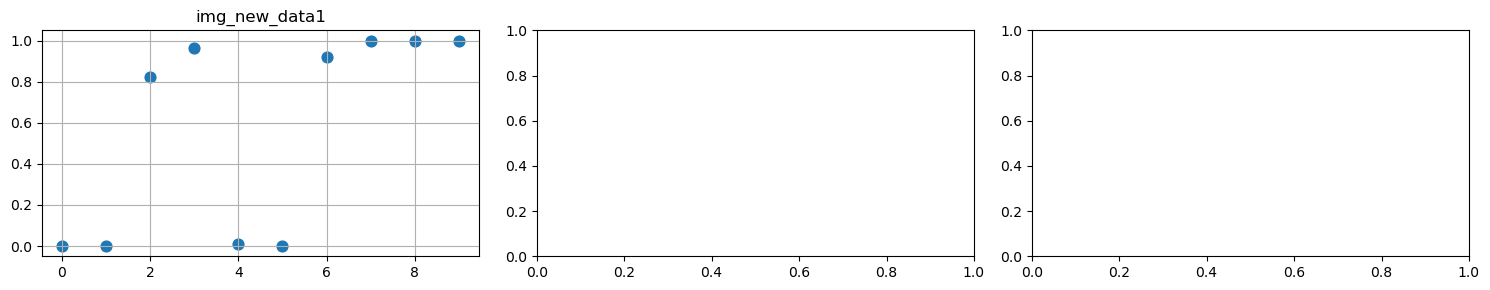

In [10]:
rbm = BernoulliRBM(n_components=10, learning_rate=0.01,n_iter=10, random_state=0, verbose=True)
#patches_combined = minmax_scale(patches_combined, feature_range=(0, 1))  # 0-1 scaling
#patches_combined = patches_combined / 225.0
rbm.fit(patches_combined)

#export ml model
joblib.dump(rbm, "exports/rbm_model_images.pkl")
print("Model saved successfully!")

new_data_points = split_patches(["img_data/test_data.jpg"],67,64)
#new_data_points[0] = new_data_points[0] / 225.0
#new_data_points[0] = minmax_scale(new_data_points[0], feature_range=(0, 1)) 
patch_trans = rbm.transform(new_data_points[0])
print(patch_trans.shape)
vis = []
for i in range(len(patch_trans[0])):
    print(patch_trans[0][i])
    vis.append([i, patch_trans[0][i]])
vis = np.array(vis)
print(vis.shape)
plot_vis([vis])

## 1.3 Datasets
Free image library used so far to download random images: https://unsplash.com/collections